# pytorch에서 제공하는 fashion minst 데이터셋과 CNN 을 이용한 분류 모델을 훈련하는 실습입니다.

p.179 5.2 합성곱 신경망 맛보기 참고

## 1. 자신의 컴퓨터에 설치된 torch, torchvision의 버전을 확인하고, GPU 지원 여부를 확인합니다.


In [2]:
import torch
torch.__version__

'2.5.1'

In [3]:
import torchvision
torchvision.__version__

'0.20.1'

In [4]:
torch.cuda.is_available()

True

In [1]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

## 2. 자신의 컴퓨터에 설치된 python 버전 및 라이브러리 설치 경로를 확인해 보세요.

In [41]:
import sys
sys.version, sys.path

('3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]',
 ['c:\\DevTool\\anaconda3\\envs\\torch_book\\python312.zip',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\DLLs',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\Lib',
  'c:\\DevTool\\anaconda3\\envs\\torch_book',
  '',
  'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages',
  'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32',
  'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib',
  'C:\\Users\\user\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\Lib\\site-packages',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\Lib\\site-packages\\win32',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\Lib\\site-packages\\win32\\lib',
  'c:\\DevTool\\anaconda3\\envs\\torch_book\\Lib\\site-packages\\Pythonwin'])

## 3. torchvision에서 제공하는 fashion mnist dataset (torchvision.datasets.FashionMNIST) 를 다운로드 받으세요. 이때, train (6만장), test(1만장) 을 각각 다운로드 받아 dataset_train 과 dataset_test 변수에 각각 저장하세요.

In [42]:
dataset_train = torchvision.datasets.FashionMNIST("data", download=True, transform=transforms.Compose([transforms.ToTensor()]))
dataset_test = torchvision.datasets.FashionMNIST("data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()])) 

In [43]:
dataset_train.data.shape, dataset_test.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

## 4. torch.rand 를 이용하여 (32, 1, 28, 28) 크기의 데이터를 생성해 input 변수에 저장하세요.

In [44]:
input = torch.rand((32, 1, 28, 28))

## 5. torch.nn.Conv2d 를 이용하여 (32, 8, 28, 28) 출력을 내는 CNN 레이어를 생성하여 cnn1 변수에 저장하세요. (hint: padding='same' 사용해 보기)

In [45]:
cnn1 = torch.nn.Conv2d(1, 8, kernel_size=3, padding=1)

## 6. input 데이터를 cnn1 레이어에 통과시킨 후, activation function(torch.nn.Sigmoid) 레이어를 생성하여 sigmoid1 변수에 저장하고, x 를 여기에 적용한 결과를 다시 x 변수에 저장하세요.

In [46]:
x = cnn1(input)
sigmoid1 = nn.Sigmoid()
x = sigmoid1(x)
x.shape

torch.Size([32, 8, 28, 28])

## 7. x 변수에 저장된 feature maps 데이터의 width, height 의 크기를 절반으로 만드는 torch.nn.MaxPool2D 를 생성하여 pool1 변수에 저장합니다. 다음으로 생성한 풀링 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요. 단, x 변수의 입력 전과 입력 후의 shape 을 출력하여 크기가 절반으로 줄어 들었는지 확인해 봅니다.

In [47]:
print(f'전 : {x.shape}')
pool1 = nn.MaxPool2d(2)
x = pool1(x)
print(f'후 : {x.shape}')

전 : torch.Size([32, 8, 28, 28])
후 : torch.Size([32, 8, 14, 14])


## 8. torch.nn.Conv2d 를 이용하여 (32, 8, 14, 14) 입력을 받아 (32, 16, 14, 14) 출력을 내는 CNN 레이어를 생성하여 cnn2 변수에 저장하세요. torch.nn.Sigmoid 레이어를 생성하여 sigmoid2 변수에 저장합니다. 이어서 생성한 활성화 함수를 x에 적용한 결과를 다시 x 변수에 저장하세요.



In [48]:
cnn2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
sigmoid2 = nn.Sigmoid()
x = cnn2(x)
x = sigmoid2(x)

## 9. x 변수에 저장된 데이터의 width, height 의 크기를 절반으로 만드는 torch.nn.MaxPool2D 를 생성하여 pool2 변수에 저장합니다. 다음으로 생성한 풀링 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요. 단, x 변수의 입력 전과 입력 후의 shape 을 출력하여 크기가 절반으로 줄어 들었는지 확인해 봅니다.

In [49]:
print(f'전 : {x.shape}')
pool2 = nn.MaxPool2d(2)
x = pool2(x)
print(f'후 : {x.shape}')

전 : torch.Size([32, 16, 14, 14])
후 : torch.Size([32, 16, 7, 7])


## 10. torch.nn.Flatten 를 이용하여 (32, 16, 7, 7) 입력을 받아 (32, 784) 출력을 내는 Flatten 레이어를 생성하여 flatten 변수에 저장하세요. 다음으로 생성한 flatten 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [50]:
flatten = nn.Flatten()
x = flatten(x)
x.shape

torch.Size([32, 784])

## 11. torch.nn.Linear 를 이용하여 (32, 784) 입력을 받아 (32, 128) 을 출력하는 linear 레이어를 생성하여 linear1 변수에 저장하세요. 다음으로 생성한 flatten 레이어에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [51]:
linear1 = nn.Linear(784, 128)
x = linear1(x)
x.shape

torch.Size([32, 128])

## 12. torch.nn.Sigmoid 레이어를 생성하여 sigmoid3 변수에 저장하고, x 변수를 활성화 함수에 통과 시킨 후, 다시 x 변수에 저장하세요.

In [52]:
sigmoid3 = nn.Sigmoid()
x = sigmoid3(x)
x.shape

torch.Size([32, 128])

## 13. torch.nn.Linear 를 이용하여 (32, 128) 입력을 받아 (32, 10) 을 출력하는 linear 레이어를 생성하여 linear2 변수에 저장하세요. 다음으로 torch.nn.Softmax 에 x 변수를 통과시켜 그 결과를 다시 x 변수에 저장하세요.

In [53]:
linear2 = nn.Linear(128, 10)
x = linear2(x)
softmax = nn.Softmax(dim=1)
x = softmax(x)

In [54]:
# x.shape

## 14. torch.nn.Sequential 을 이용하여 features 레이어와 classifier 레이어를 정의하세요.

* features: cnn1, sigmoid1, pool1, cnn2, sigmoid2, pool2 객체들을 이용

* torch.rand 를 이용하여 (32, 1, 28, 28) 데이터를 생성 후, features 에 전달하여 출력 shape 이 (32, 16, 7, 7) 인지 확인해 보세요.

* classifier: linear1 sigmoid3, linear2, softmax 객체들을 이용

* torch.rand 를 이용하여 (32, 16 * 7 * 7) 데이터를 생성 후, classifier 전달하여 출력 shape 이 (32, 10) 인지 확인해 보세요.

In [55]:
input = torch.rand(32, 1, 28, 28)
features = nn.Sequential(
            cnn1,
            sigmoid1,
            pool1,
            cnn2,
            sigmoid2,
            pool2,
          )
x = features(input)       
x.shape


torch.Size([32, 16, 7, 7])

In [56]:
classifier = nn.Sequential(
              linear1,
              sigmoid3,
              linear2,
              softmax
            )
x = flatten(x)
x = classifier(x)
x.shape

torch.Size([32, 10])

## 15. torch.nn.Module 를 상속받아 FashionCNN(torch.nn.Module) 클래스를 정의합니다.

* FashionCNN 클래스는 내부 멤버변수로 features 와 classifier 를 가집니다.

* torch.nn.Flatten 레이어를 FashionCNN 클래스의 내부 변수 flatten 에 저장합니다.

* forward(self, x): 입력으로 들어온 x 를 features > flatten > classifier 순서로 차례대로 통과시킵니다. 각 레이어의 입력은 x 변수이고, 결과 역시 x에 다시 저장합니다. 마지막에 x 를 반환합니다.

* FashionCNN 클래스를 이용하여 객체를 만들고, torch.rand 를 이용하여 (32, 1, 28, 28) 데이터를 생성 후, 모델에 데이터를 입력하여 출력 데이터의 shape 이 (32, 10) 으로 나오는지 확인합니다.

In [57]:
class FashionCNN(nn.Module):
  def __init__(self):
    super(FashionCNN, self).__init__()
    self.features = nn.Sequential(
                      cnn1,
                      sigmoid1,
                      pool1,
                      cnn2,
                      sigmoid2,
                      pool2,
                    )
    self.classifier = nn.Sequential(
                        linear1,
                        sigmoid3,
                        linear2,
                        softmax
                      )
    self.flatten = nn.Flatten()

  def forward(self, x):
    x = self.features(x)
    x = flatten(x)
    x = classifier(x)
    return x


In [58]:
input = torch.rand(32, 1, 28, 28)
model = FashionCNN()
out = model(input)

## 16. torch.nn.CrossEntropyLoss 레이어를 생성하여 loss_fn 변수에 저장합니다.


In [59]:
loss_fn = nn.CrossEntropyLoss()

## 17. torch.optim.Adam 를 생성하여 optimizer 변수에 저장합니다.


In [60]:
# dir(model.parameters()) 모델이 생성한 가중치(and 편차)를 담고 있음
# param=list(model.parameters())
# W=param[0].data
# b=param[1].data
# print(W.item(),b.item())
# 위 코드로 가중치를 볼 수 있음

In [61]:
optimizer = torch.optim.Adam(model.parameters())

## 18. 모델 훈련을 위해 dataset_train, dataset_test 데이터로 torch.utils.data.DataLoader 를 batch_size 32 로 생성하여 dataloader_train, dataloader_test 변수에 저장합니다.

In [62]:
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=true)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=true)

In [63]:
for X, y in dataloader_train:
  print(X.shape, y.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


### 18-1. 위 코드 실행 시 다음과 같은 에러가 발생하면 torchvision.transforms.ToTensor 객체를 생성하여 FasionMNIST 클래스의 생성자에 전달합니다. 다시 dataset > dataloader 순서로 생성하여 제공되는 for 문이 동작하늕지 확인하세요.

```
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>
```

In [64]:
from torchvision.transforms import ToTensor

In [65]:
for X, y in dataloader_train:
  print(X.shape, y.shape)
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


## 19. train loop 를 구현하여 모델을 학습시켜 봅니다.

In [75]:
for X, y in dataloader_train:
  output = model(X)
  print(loss_fn(output, y)) # 32개에 대한 평균을 반환
  break

tensor(1.5256, grad_fn=<NllLossBackward0>)


In [68]:
# model.train()
for X, y in dataloader_train:
  # 순전파
  outputs = model(X)
  loss = loss_fn(outputs, y)

  # 역전파 및 가중치 업데이트
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

## 20. 이번에는 train loop 를 구현 시 epochs 10 으로 모델을 학습시키고, 한번의 epoch 이 종료될 때 마다 loss_history 리스트에 loss 값을 저장하고 loss 값을 콘솔에 출력합니다.

In [ ]:
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for X, y in dataloader_train:
        # X = Variable(X)
        # y = Variable(y) 

        output = model(X) # (32, 10)
        loss = loss_fn(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    loss_history.append(loss.data)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.data:.4f}")

Epoch [1/10], Loss: 1.6313
Epoch [2/10], Loss: 1.6205
Epoch [3/10], Loss: 1.6218
Epoch [4/10], Loss: 1.6102
Epoch [5/10], Loss: 1.5844
Epoch [6/10], Loss: 1.5876
Epoch [7/10], Loss: 1.5822
Epoch [8/10], Loss: 1.5696
Epoch [9/10], Loss: 1.5729
Epoch [10/10], Loss: 1.5710


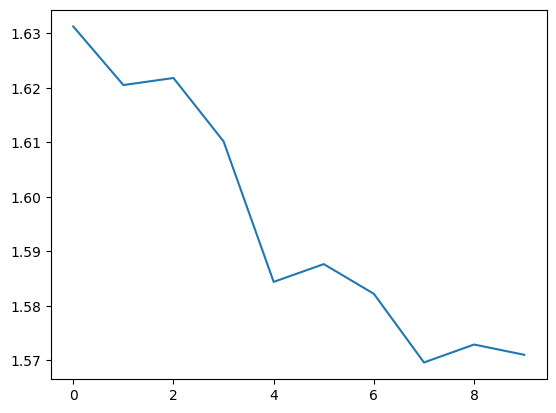

In [74]:
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), loss_history)

## 21. GPU 를 사용하여 모델을 학습시켜 보세요. GPU 의 메모리가 허용하는 한도까지 batch_size 를 늘려서 다시 실행해 보세요.

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [34]:
dataloader_train = DataLoader(dataset_train, batch_size=32768)
dataloader_test = DataLoader(dataset_test, batch_size=32768) # gpu메모리 : 약 7GB 사용

In [36]:
model.to(device)
optimizer = torch.optim.Adam(model.parameters())
num_epochs = 10
loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for X, y in dataloader_train:
        X, y = X.to(device), y.to(device)
        # X = Variable(X)
        # y = Variable(y)
        out = model(X)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.data)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.data:.4f}")

Epoch [1/10], Loss: 1.5787
Epoch [2/10], Loss: 1.5775
Epoch [3/10], Loss: 1.5769
Epoch [4/10], Loss: 1.5767
Epoch [5/10], Loss: 1.5766
Epoch [6/10], Loss: 1.5763
Epoch [7/10], Loss: 1.5759
Epoch [8/10], Loss: 1.5757
Epoch [9/10], Loss: 1.5755
Epoch [10/10], Loss: 1.5754


## 22. 2024-12-23 실습

In [18]:
class Model1(nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.layer1 = nn.Sequential(
                    nn.Conv2d(in_channels=3, out_channels=48, kernel_size=3),
                    nn.ReLU(),
                    nn.Dropout()
                  )
  
  def forward(self, x):
    x = self.layer1(x)
    return x

input = torch.rand(32, 3, 224, 224)
model = Model1()
out = model(input)
out.shape

torch.Size([32, 48, 222, 222])